In [1]:
library(ggplot2)
library(dplyr)
library(cowplot)
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/update_lit_sites.RData")
Baka_best_covs <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Baka_sex_methPC23_Neutro_genoPC12345_no_meqtl_regress.ps", header=FALSE)
KHS_best_covs <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/KHS_sex_batch_PC13_meth_Neutro_genoPCs_no_meqtl_regress.ps", header=FALSE)
Himba_best_covs <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Himba_sex_cpPCs_Neutro_genoPCs_no_meqtl_regress.ps", header=FALSE)

# ###MEQTL regress
# Baka_best_covs <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Baka_sex_methPC23_Neutro_genoPC12345_meqtl_regressed.ps", header=FALSE)
# Himba_best_covs <-  read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Himba_sex_cpPCs_Neutro_genoPCs_meqtl_regressed.ps", header=FALSE)
# KHS_best_covs <-  read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/KHS_sex_batch_PC13_meth_Neutro_genoPCs_meqtl_regressed.ps", header=FALSE)

#FUSION regress
# Baka_best_covs <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Baka_sex_methPC23_Neutro_genoPC12345_fusion_regressed.ps", header=FALSE)
# Himba_best_covs <-  read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Himba_sex_cpPCs_Neutro_genoPCs_fusion_regressed.ps", header=FALSE)
# KHS_best_covs <-  read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/KHS_sex_batch_PC13_meth_Neutro_genoPCs_fusion_regressed.ps", header=FALSE)



KHS_best_covs$V1 <- as.character(KHS_best_covs$V1)
Baka_best_covs$V1 <- as.character(Baka_best_covs$V1)
Himba_best_covs$V1 <- as.character(Himba_best_covs$V1)
colnames(Baka_best_covs)<-c("CPG.Labels","V2","P.value")
colnames(KHS_best_covs)<-c("CPG.Labels","V2","P.value")
colnames(Himba_best_covs)<-c("CPG.Labels","V2","P.value")

rownames(Baka_best_covs) <- Baka_best_covs$CPG.Labels
rownames(KHS_best_covs) <- KHS_best_covs$CPG.Labels
rownames(Himba_best_covs) <- Himba_best_covs$CPG.Labels



print("here")
sig_sites <- function(df){
    n <- nrow(df)
    df_subset <- subset(df, P.value < .05/n)
}

Himba_sig <- sig_sites(Himba_best_covs)
KHS_sig <- sig_sites(KHS_best_covs)
Baka_sig <- sig_sites(Baka_best_covs)

print(nrow(Himba_sig))
print(nrow(KHS_sig))
print(nrow(Baka_sig))
sig_in_any_ <- as.vector(unique(c(Himba_sig$CPG.Labels, KHS_sig$CPG.Labels, Baka_sig$CPG.Labels)))

# Filter CPG labels present in all three datasets
overlap_KHS_Baka <- intersect(KHS_best_covs$CPG.Labels,  Baka_best_covs$CPG.Labels)
overlap_Himba_KHS <- intersect(Himba_best_covs$CPG.Labels, KHS_best_covs$CPG.Labels)
overlap_Himba_Baka <- intersect(Himba_best_covs$CPG.Labels, Baka_best_covs$CPG.Labels)
head(Baka_best_covs)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




[1] "here"
[1] 347
[1] 149
[1] 282


CPG.Labels V2         P.value    
cg27666123 cg27666123 -111.72381 0.763014178
cg27666046 cg27666046 -245.26507 0.017333605
cg27665985 cg27665985 -260.20087 0.008873956
cg27665925 cg27665925  198.15808 0.682969410
cg27665860 cg27665860 -196.84180 0.485071908
cg27665829 cg27665829  -78.63956 0.715910668

[1] 397576
[1] 397576
[1] 365501
[1] 365501
[1] 356942
[1] 356942


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message in geom_text(data = subset(KHS_Baka_combined_V2, sig_in_any == 1), :
"All aesthetics have length 1, but the data has 467 rows.
i Please consider using `annotate()` or provide this layer with data containing a single row."
Warning message in geom_text(data = subset(Himba_KHS_combined_V2, sig_in_any == :
"All aesthetics have length 1, but the data has 438 rows.
i Please consider using `annotate()` or provide this layer with data containing a single row."
Warning message in geom_text(data = subset(Himba_Baka_combined_V2, sig_in_any == :
"All aesthetics have length 1, but the data has 434 rows.
i Please consider using `annotate()` or provide this layer with data containing a single row."


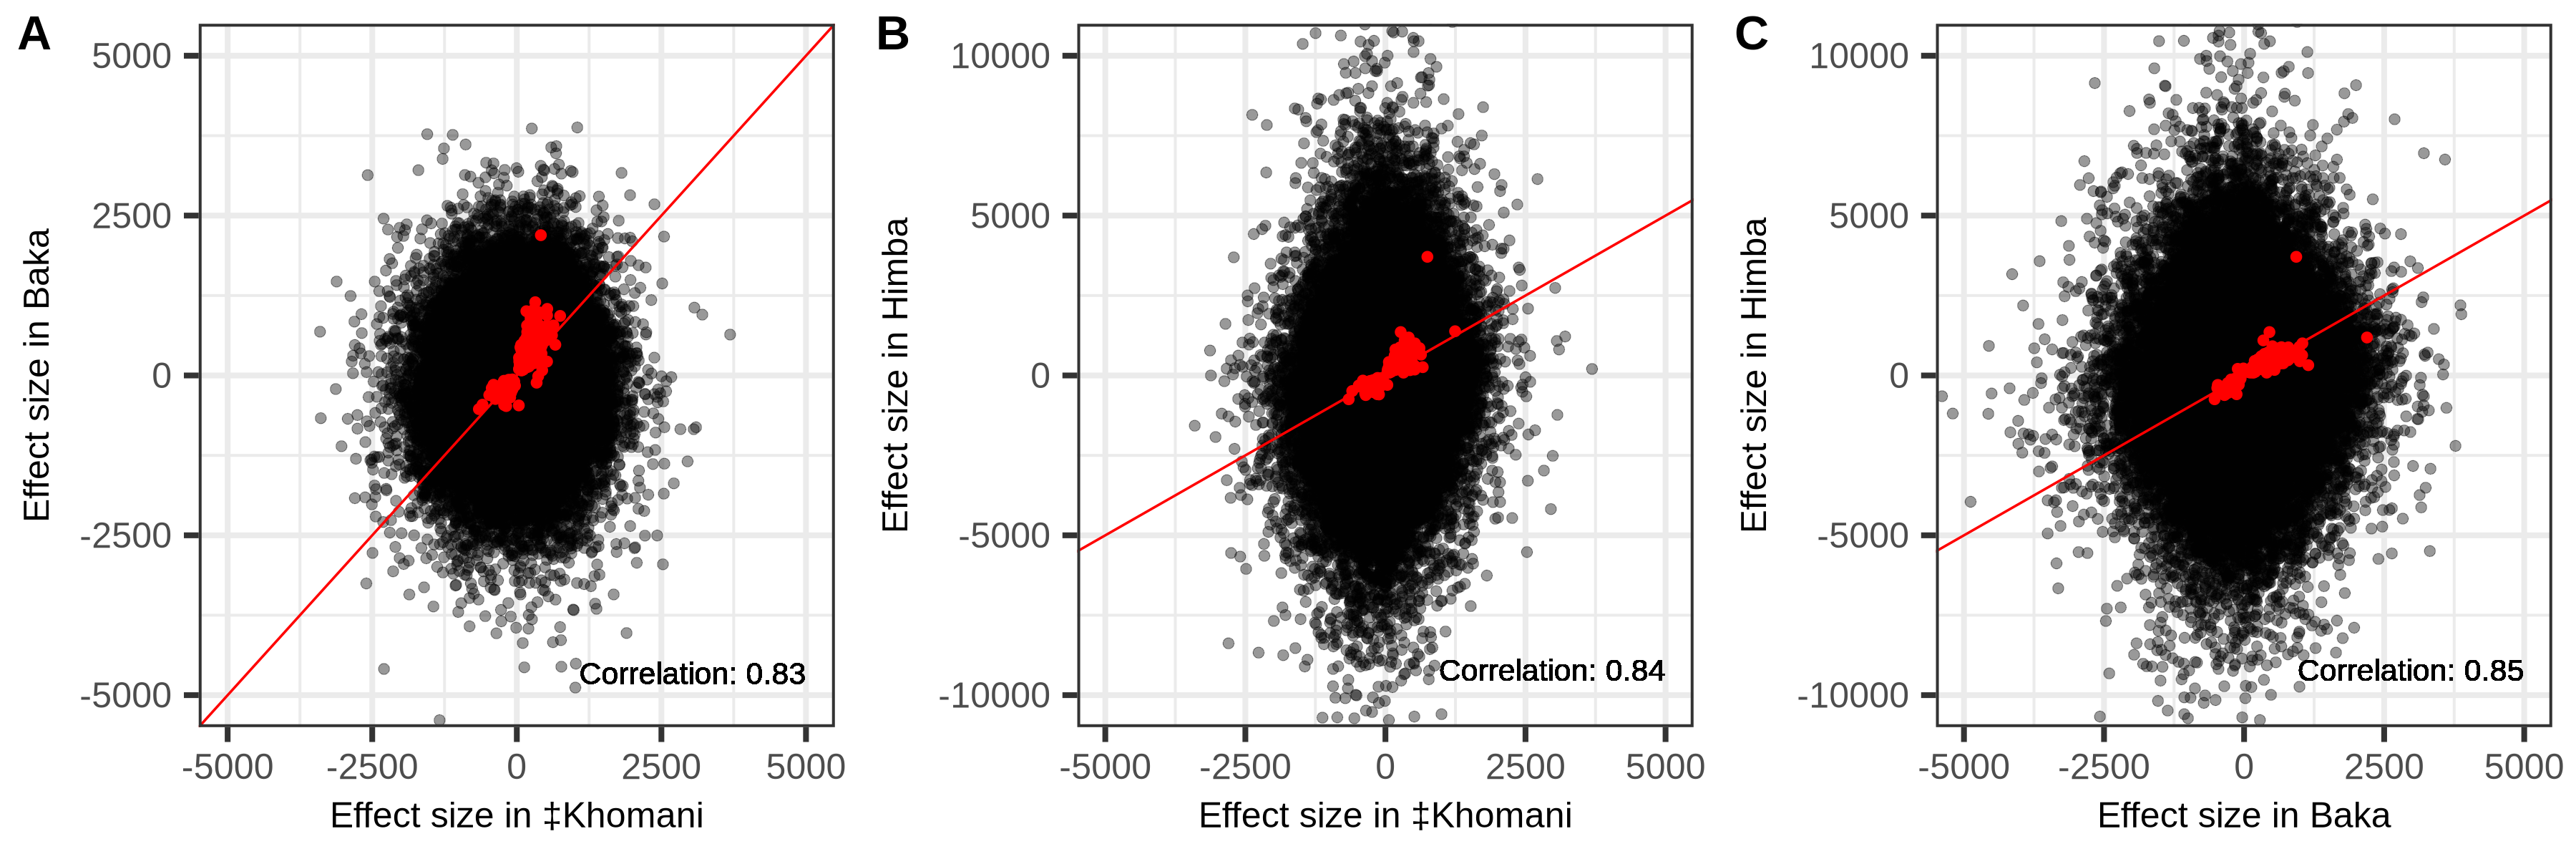

In [2]:
#overlap KHS Baka 
KHS_eff <- KHS_best_covs[c(overlap_KHS_Baka ), ]
Baka_eff <- Baka_best_covs[c(overlap_KHS_Baka ), ]
KHS_Baka_combined_V2 <- cbind(KHS_V2 = as.numeric(KHS_eff$V2), Baka_V2 = as.numeric(Baka_eff$V2), row.names = rownames(KHS_eff))
KHS_Baka_combined_V2 <- as.data.frame(KHS_Baka_combined_V2)
KHS_Baka_combined_V2$KHS_V2 <- as.numeric(KHS_Baka_combined_V2$KHS_V2)
KHS_Baka_combined_V2$Baka_V2 <- as.numeric(KHS_Baka_combined_V2$Baka_V2)
KHS_Baka_combined_V2$sig_in_any <- 0
KHS_Baka_combined_V2[KHS_Baka_combined_V2$row.names %in% sig_in_any_, "sig_in_any"] <- 1
print(nrow(KHS_Baka_combined_V2))
#KHS_Baka_combined_V2 <- KHS_Baka_combined_V2[abs(KHS_Baka_combined_V2$Baka_V2) < 10000, ]
#KHS_Baka_combined_V2 <- KHS_Baka_combined_V2[abs(KHS_Baka_combined_V2$KHS_V2) < 10000, ]
print(nrow(KHS_Baka_combined_V2))
#KHS_Baka_combined_V2$Baka_V2 <- scale(KHS_Baka_combined_V2$Baka_V2)
#KHS_Baka_combined_V2$KHS_V2 <- scale(KHS_Baka_combined_V2$KHS_V2)

#overlap Himba KHS
Himba_eff <- Himba_best_covs[c(overlap_Himba_KHS), ]
KHS_eff <- KHS_best_covs[c(overlap_Himba_KHS), ]
Himba_KHS_combined_V2 <- cbind(Himba_V2 = as.numeric(Himba_eff$V2), KHS_V2 = as.numeric(KHS_eff$V2), row.names = rownames(KHS_eff))
Himba_KHS_combined_V2 <- as.data.frame(Himba_KHS_combined_V2)

Himba_KHS_combined_V2$KHS_V2 <- as.numeric(Himba_KHS_combined_V2$KHS_V2)
Himba_KHS_combined_V2$Himba_V2 <- as.numeric(Himba_KHS_combined_V2$Himba_V2)
Himba_KHS_combined_V2$sig_in_any <- 0
Himba_KHS_combined_V2[Himba_KHS_combined_V2$row.names %in% sig_in_any_, "sig_in_any"] <- 1
print(nrow(Himba_KHS_combined_V2))
#Himba_KHS_combined_V2 <- Himba_KHS_combined_V2[abs(Himba_KHS_combined_V2$Himba_V2) < 10000, ]
#Himba_KHS_combined_V2 <- Himba_KHS_combined_V2[abs(Himba_KHS_combined_V2$KHS_V2) < 10000, ]
#Himba_KHS_combined_V2$Himba_V2 <- scale(Himba_KHS_combined_V2$Himba_V2)
#Himba_KHS_combined_V2$KHS_V2 <- scale(Himba_KHS_combined_V2$KHS_V2)
print(nrow(Himba_KHS_combined_V2))

#overlap Himba Baka
Himba_eff <- Himba_best_covs[c(overlap_Himba_Baka), ]
Baka_eff <- Baka_best_covs[c(overlap_Himba_Baka), ]
Himba_Baka_combined_V2 <- cbind(Himba_V2 = as.numeric(Himba_eff$V2), Baka_V2 = as.numeric(Baka_eff$V2), row.names = rownames(Baka_eff))
Himba_Baka_combined_V2 <- as.data.frame(Himba_Baka_combined_V2)

Himba_Baka_combined_V2$Himba_V2 <- as.numeric(Himba_Baka_combined_V2$Himba_V2)
Himba_Baka_combined_V2$Baka_V2 <- as.numeric(Himba_Baka_combined_V2$Baka_V2)
Himba_Baka_combined_V2$sig_in_any <- 0
Himba_Baka_combined_V2[Himba_Baka_combined_V2$row.names %in% sig_in_any_, "sig_in_any"] <- 1
print(nrow(Himba_Baka_combined_V2))
#Himba_Baka_combined_V2 <- Himba_Baka_combined_V2[abs(Himba_Baka_combined_V2$Himba_V2) < 10000, ]
#Himba_Baka_combined_V2 <- Himba_Baka_combined_V2[abs(Himba_Baka_combined_V2$Baka_V2) < 10000, ]
#Himba_Baka_combined_V2$Himba_V2 <- scale(Himba_Baka_combined_V2$Himba_V2)
#Himba_Baka_combined_V2$Baka_V2 <- scale(Himba_Baka_combined_V2$Baka_V2)
print(nrow(Himba_Baka_combined_V2))



##cor and Rsq just for the red points
KHS_Baka_lm <- lm(Baka_V2 ~ KHS_V2, data = KHS_Baka_combined_V2[KHS_Baka_combined_V2$sig_in_any == 1, ])
KHS_Baka_cor <- cor(KHS_Baka_combined_V2[KHS_Baka_combined_V2$sig_in_any == 1, "KHS_V2"], KHS_Baka_combined_V2[KHS_Baka_combined_V2$sig_in_any == 1, "Baka_V2"])
KHS_Baka_Rsq <- summary(KHS_Baka_lm)$r.squared

Himba_KHS_lm <- lm(Himba_V2 ~ KHS_V2, data = Himba_KHS_combined_V2[Himba_KHS_combined_V2$sig_in_any == 1, ])
Himba_KHS_cor <- cor(Himba_KHS_combined_V2[Himba_KHS_combined_V2$sig_in_any == 1, "KHS_V2"], Himba_KHS_combined_V2[Himba_KHS_combined_V2$sig_in_any == 1, "Himba_V2"])
Himba_KHS_Rsq <- summary(Himba_KHS_lm)$r.squared

Himba_Baka_lm <- lm(Himba_V2 ~ Baka_V2, data = Himba_Baka_combined_V2[Himba_Baka_combined_V2$sig_in_any == 1, ])
Himba_Baka_cor <- cor(Himba_Baka_combined_V2[Himba_Baka_combined_V2$sig_in_any == 1, "Himba_V2"], Himba_Baka_combined_V2[Himba_Baka_combined_V2$sig_in_any == 1, "Baka_V2"])
Himba_Baka_Rsq <- summary(Himba_Baka_lm)$r.squared


# For plot1
# For plot1
# Calculate common axis limits for consistency
x_limits <- range(c(KHS_Baka_combined_V2$KHS_V2, Himba_KHS_combined_V2$KHS_V2, Himba_Baka_combined_V2$Baka_V2))
y_limits <- range(c(KHS_Baka_combined_V2$Baka_V2, Himba_KHS_combined_V2$Himba_V2, Himba_Baka_combined_V2$Himba_V2))
options(repr.plot.width = 30, repr.plot.height = 20)

# Plot 1
plot1 <- ggplot(KHS_Baka_combined_V2, aes(x = KHS_V2, y = Baka_V2, color = factor(sig_in_any))) +
  geom_point(data = subset(KHS_Baka_combined_V2, sig_in_any == 0), alpha = 0.4, size = 4) +  # Plot points where sig_in_any is 0
  geom_point(data = subset(KHS_Baka_combined_V2, sig_in_any == 1), size = 4) +  # Plot points where sig_in_any is 1
  geom_text(data = subset(KHS_Baka_combined_V2, sig_in_any == 1), aes(label = paste( 
    sprintf("Correlation: %.2f", KHS_Baka_cor))), 
    x =5000, y = -4500, hjust = 1, vjust = 1, size = 9, color = "black") +
  labs(x = "Effect size in \u2021Khomani", y = "Effect size in Baka") +
     theme_bw(base_size = 50) + 
  theme(legend.position = "none",
         axis.text = element_text(size = 30),
        axis.title = element_text(size = 30, margin = margin(r = 10)),
        plot.title = element_text(size = 50 ), plot.margin = margin(t = 20, r = 20, b = 20, l = 20)) +
  geom_abline(intercept = 0, slope = 1, linetype = "solid", color = "red", size = 1) +  # Add one-to-one line in grey
  scale_color_manual(values = c("0" = "black", "1" = "red"), guide = "none") +
  coord_cartesian(xlim = c(-5000, 5000), ylim = c(-5000, 5000))

# Plot 2
plot2 <- ggplot(Himba_KHS_combined_V2, aes(x = KHS_V2, y = Himba_V2, color = factor(sig_in_any))) +
  geom_point(data = subset(Himba_KHS_combined_V2, sig_in_any == 0), alpha = 0.4, size = 4) +  # Plot points where sig_in_any is 0
  geom_point(data = subset(Himba_KHS_combined_V2, sig_in_any == 1), size = 4) +  # Plot points where sig_in_any is 1
  geom_text(data = subset(Himba_KHS_combined_V2, sig_in_any == 1), aes(label = paste(
    sprintf("Correlation: %.2f", Himba_KHS_cor))), 
    x = 5000, y = -8900, hjust = 1, vjust = 1, size = 9, color = "black") +
  labs(x = "Effect size in \u2021Khomani", y = "Effect size in Himba") +
      theme_bw(base_size = 50) + 
  theme(legend.position = "none",
         axis.text = element_text(size = 30),
        axis.title = element_text(size = 30, margin = margin(r = 10)),
        plot.title = element_text(size = 50 ), plot.margin = margin(t = 20, r = 20, b = 20, l = 20))  +
  geom_abline(intercept = 0, slope = 1, linetype = "solid", color = "red", size = 1) +  # Add one-to-one line in grey
  scale_color_manual(values = c("0" = "black", "1" = "red"), guide = "none") +
  coord_cartesian(xlim = c(-5000, 5000), ylim = c(-10000, 10000))

# Plot 3
plot3 <- ggplot(Himba_Baka_combined_V2, aes(x = Baka_V2, y = Himba_V2, color = factor(sig_in_any))) +
  geom_point(data = subset(Himba_Baka_combined_V2, sig_in_any == 0), alpha = 0.4, size = 4) +  # Plot points where sig_in_any is 0
  geom_point(data = subset(Himba_Baka_combined_V2, sig_in_any == 1), size = 4) +  # Plot points where sig_in_any is 1
  geom_text(data = subset(Himba_Baka_combined_V2, sig_in_any == 1), aes(label = paste(
    sprintf("Correlation: %.2f", Himba_Baka_cor))), 
    x = 5000, y = -8900, hjust = 1, vjust = 1, size = 9, color = "black") +
  labs(x = "Effect size in Baka", y = "Effect size in Himba") + 
     theme_bw(base_size = 50) + 
  theme(legend.position = "none",
         axis.text = element_text(size = 30),
        axis.title = element_text(size = 30, margin = margin(r = 10)),
        plot.title = element_text(size = 50 ), plot.margin = margin(t = 20, r = 20, b = 20, l = 20))  +
  geom_abline(intercept = 0, slope = 1, linetype = "solid", color = "red", size = 1) +  # Add one-to-one line in grey
  scale_color_manual(values = c("0" = "black", "1" = "red"), guide = "none") +
  coord_cartesian(xlim = c(-5000, 5000), ylim = c(-10000, 10000))

# Combine the plots
cow_AC <- plot_grid(plot1, plot2, plot3, ncol = 3, nrow = 1, labels = c("A", "B", "C"), label_size = 40, rel_widths = c(1, 1, 1))

options(repr.plot.width = 30, repr.plot.height = 10)

# Display the combined plot
cow_AC
#+  theme(plot.background = element_rect(color = "black"))




# #svg("correlation_effect_sizes.svg")  #separate panels



In [3]:
# # load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/best_covs_EMMAX_with_SE_no_meqtl_regress.RData")
# # load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/best_covs_EMMAX_with_SE_meqtl_regressed.RData")
# rm(list=c("Baka_best_covs", "Himba_best_covs", "KHS_best_covs"))
# load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Himbabest_covs_with_SE_fusion_regressed.RData")
# Himba_best_covs <- best_covs

# load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Bakabest_covs_with_SE_fusion_regressed.RData")
# Baka_best_covs <- best_covs

# load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/KHSbest_covs_with_SE_fusion_regressed.RData")
# KHS_best_covs <- best_covs


# max(Himba_best_covs$V2)
# max(Baka_best_covs$V2)
# max(KHS_best_covs$V2)

# test_SE_baka_KHS <- Baka_best_covs[Baka_best_covs$CPG.Labels %in% overlap_KHS_Baka, ]
# test_SE_baka_KHS <- test_SE_baka_KHS[abs(test_SE_baka_KHS$V2) < 10000,]
# # Create a new column to indicate whether a point is in sig_in_any_
# test_SE_baka_KHS$color_group <- ifelse(test_SE_baka_KHS$CPG.Labels %in% sig_in_any_, 'In_Sig', 'Not_In_Sig')

# p_baka <- ggplot() +
#   geom_point(data = test_SE_baka_KHS[test_SE_baka_KHS$color_group == 'Not_In_Sig', ], 
#              aes(x = abs(V2), y = SE), color = 'black', alpha = 0.2, size = 5) +
#   geom_point(data = test_SE_baka_KHS[test_SE_baka_KHS$color_group == 'In_Sig', ], 
#              aes(x = abs(V2), y = SE), color = 'red', alpha = 1, size = 5) +
#   theme_minimal(base_size = 35) +  # Increase base font size
#   labs(title = "KHS Effect size vs SE", x = "abs(V2)", y = "SE") +
#   guides(alpha = "none")  # Hide the alpha legend

# # Print the plot for Baka
# print(p_baka)


# test_SE_baka_KHS <- KHS_best_covs[KHS_best_covs$CPG.Labels %in% overlap_KHS_Baka, ]
# test_SE_baka_KHS <- test_SE_baka_KHS[abs(test_SE_baka_KHS$V2) < 10000,]

# # Create a new column to indicate whether a point is in sig_in_any_
# test_SE_baka_KHS$color_group <- ifelse(test_SE_baka_KHS$CPG.Labels %in% sig_in_any_, 'In_Sig', 'Not_In_Sig')

# p_khs <- ggplot() +
#   geom_point(data = test_SE_baka_KHS[test_SE_baka_KHS$color_group == 'Not_In_Sig', ], 
#              aes(x = abs(V2), y = SE), color = 'black', alpha = 0.2, size = 5) +
#   geom_point(data = test_SE_baka_KHS[test_SE_baka_KHS$color_group == 'In_Sig', ], 
#              aes(x = abs(V2), y = SE), color = 'red', alpha = 1, size = 5) +
#   theme_minimal(base_size = 35) +  # Increase base font size
#   labs(title = "Baka Effect size vs SE", x = "abs(V2)", y = "SE") +
#   guides(alpha = "none")  # Hide the alpha legend

# # Print the plot for Baka
# print(p_khs)

# # Filter the data for Himba
# test_SE_Himba_KHS <- Himba_best_covs[Himba_best_covs$CPG.Labels %in% overlap_Himba_KHS, ]
# test_SE_Himba_KHS$color_group <- ifelse(test_SE_Himba_KHS$CPG.Labels %in% sig_in_any_, 'In_Sig', 'Not_In_Sig')
# test_SE_Himba_KHS <- test_SE_Himba_KHS[abs(test_SE_Himba_KHS$V2) < 10000,]

# # Create the plot for Himba
# p_himba <- ggplot() +
#   geom_point(data = test_SE_Himba_KHS[test_SE_Himba_KHS$color_group == 'Not_In_Sig', ], 
#              aes(x = abs(V2), y = SE), color = 'black', alpha = 0.2, size = 5) +
#   geom_point(data = test_SE_Himba_KHS[test_SE_Himba_KHS$color_group == 'In_Sig', ], 
#              aes(x = abs(V2), y = SE), color = 'red', alpha = 1, size = 5) +
#   theme_minimal(base_size = 35) +  # Increase base font size
#   labs(title = "Himba Effect size vs SE", x = "abs(V2)", y = "SE") +
#   guides(alpha = "none")  # Hide the alpha legend

# # Print the plot for Himba
# print(p_himba)

[1] 3221


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


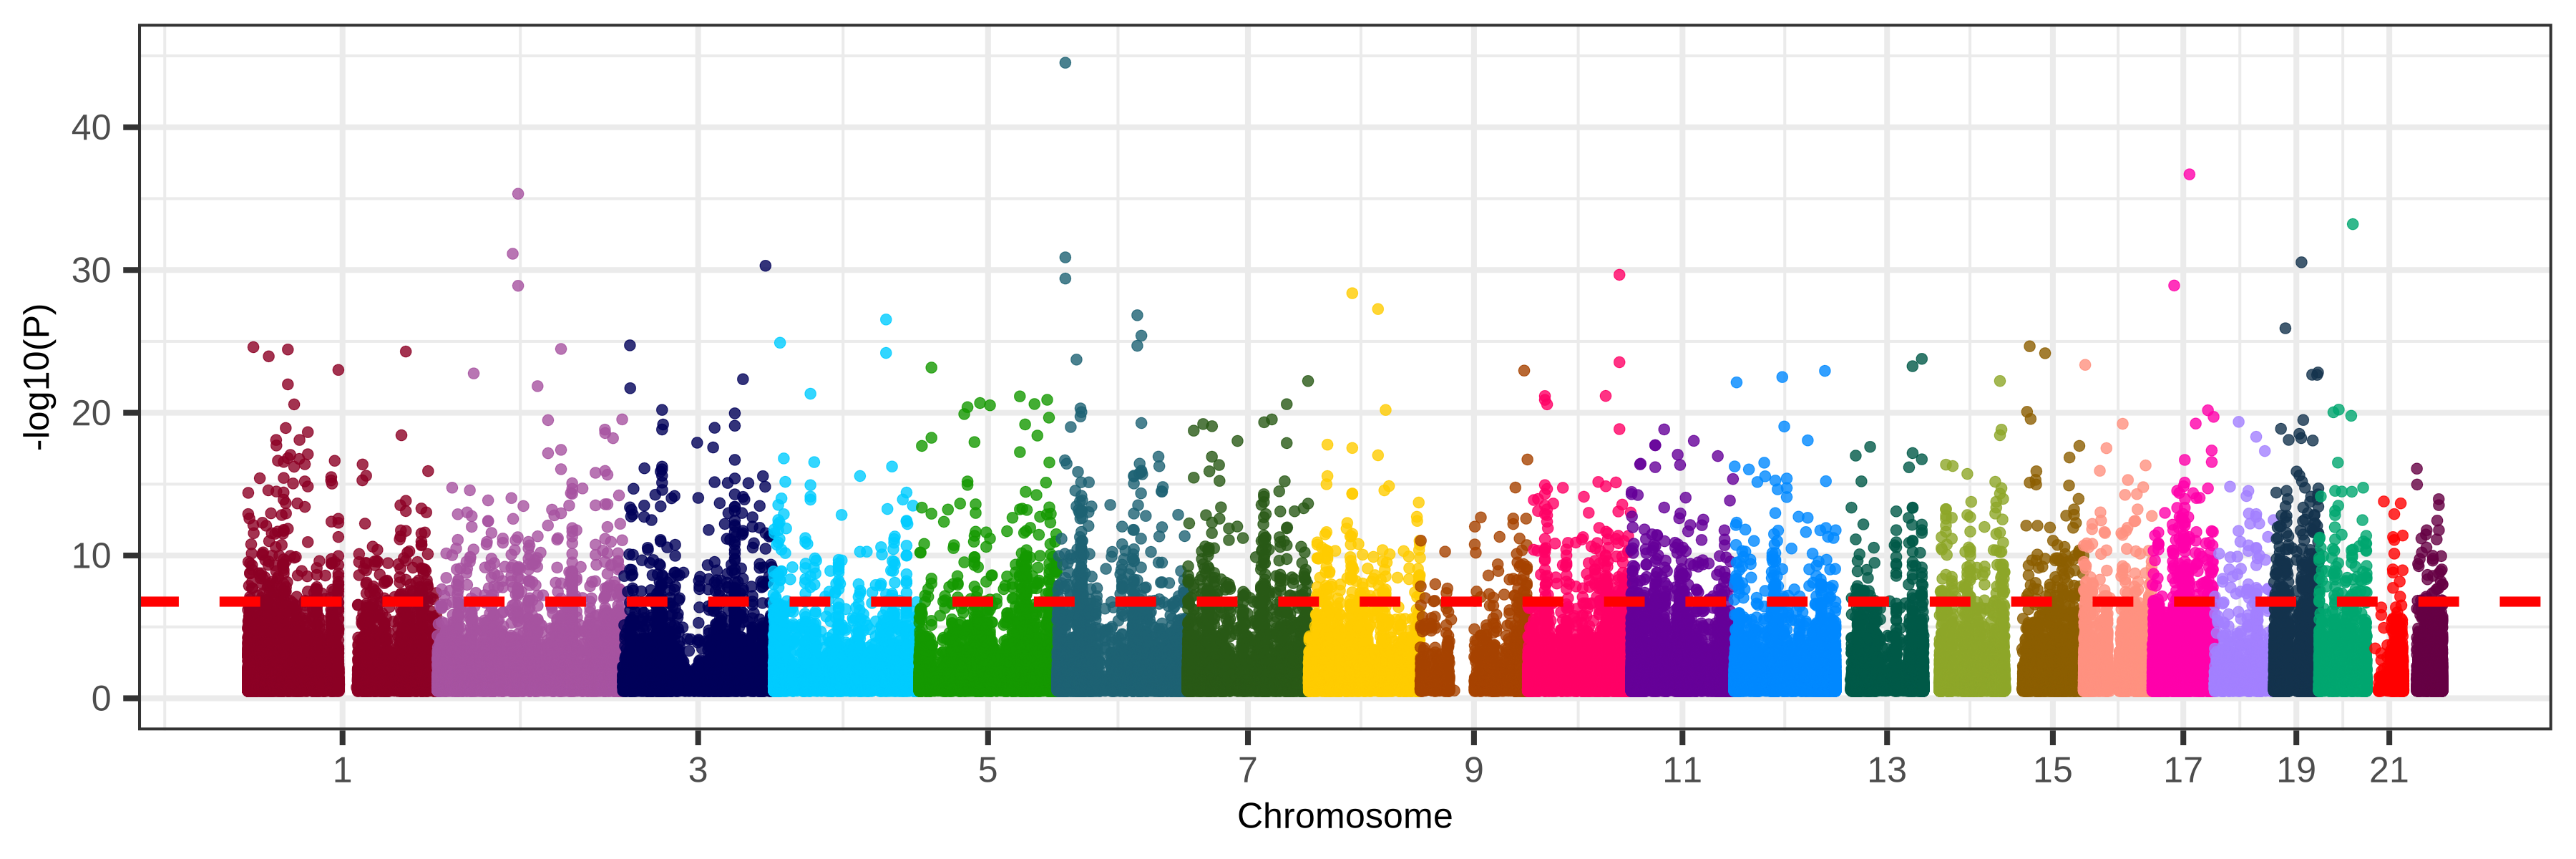

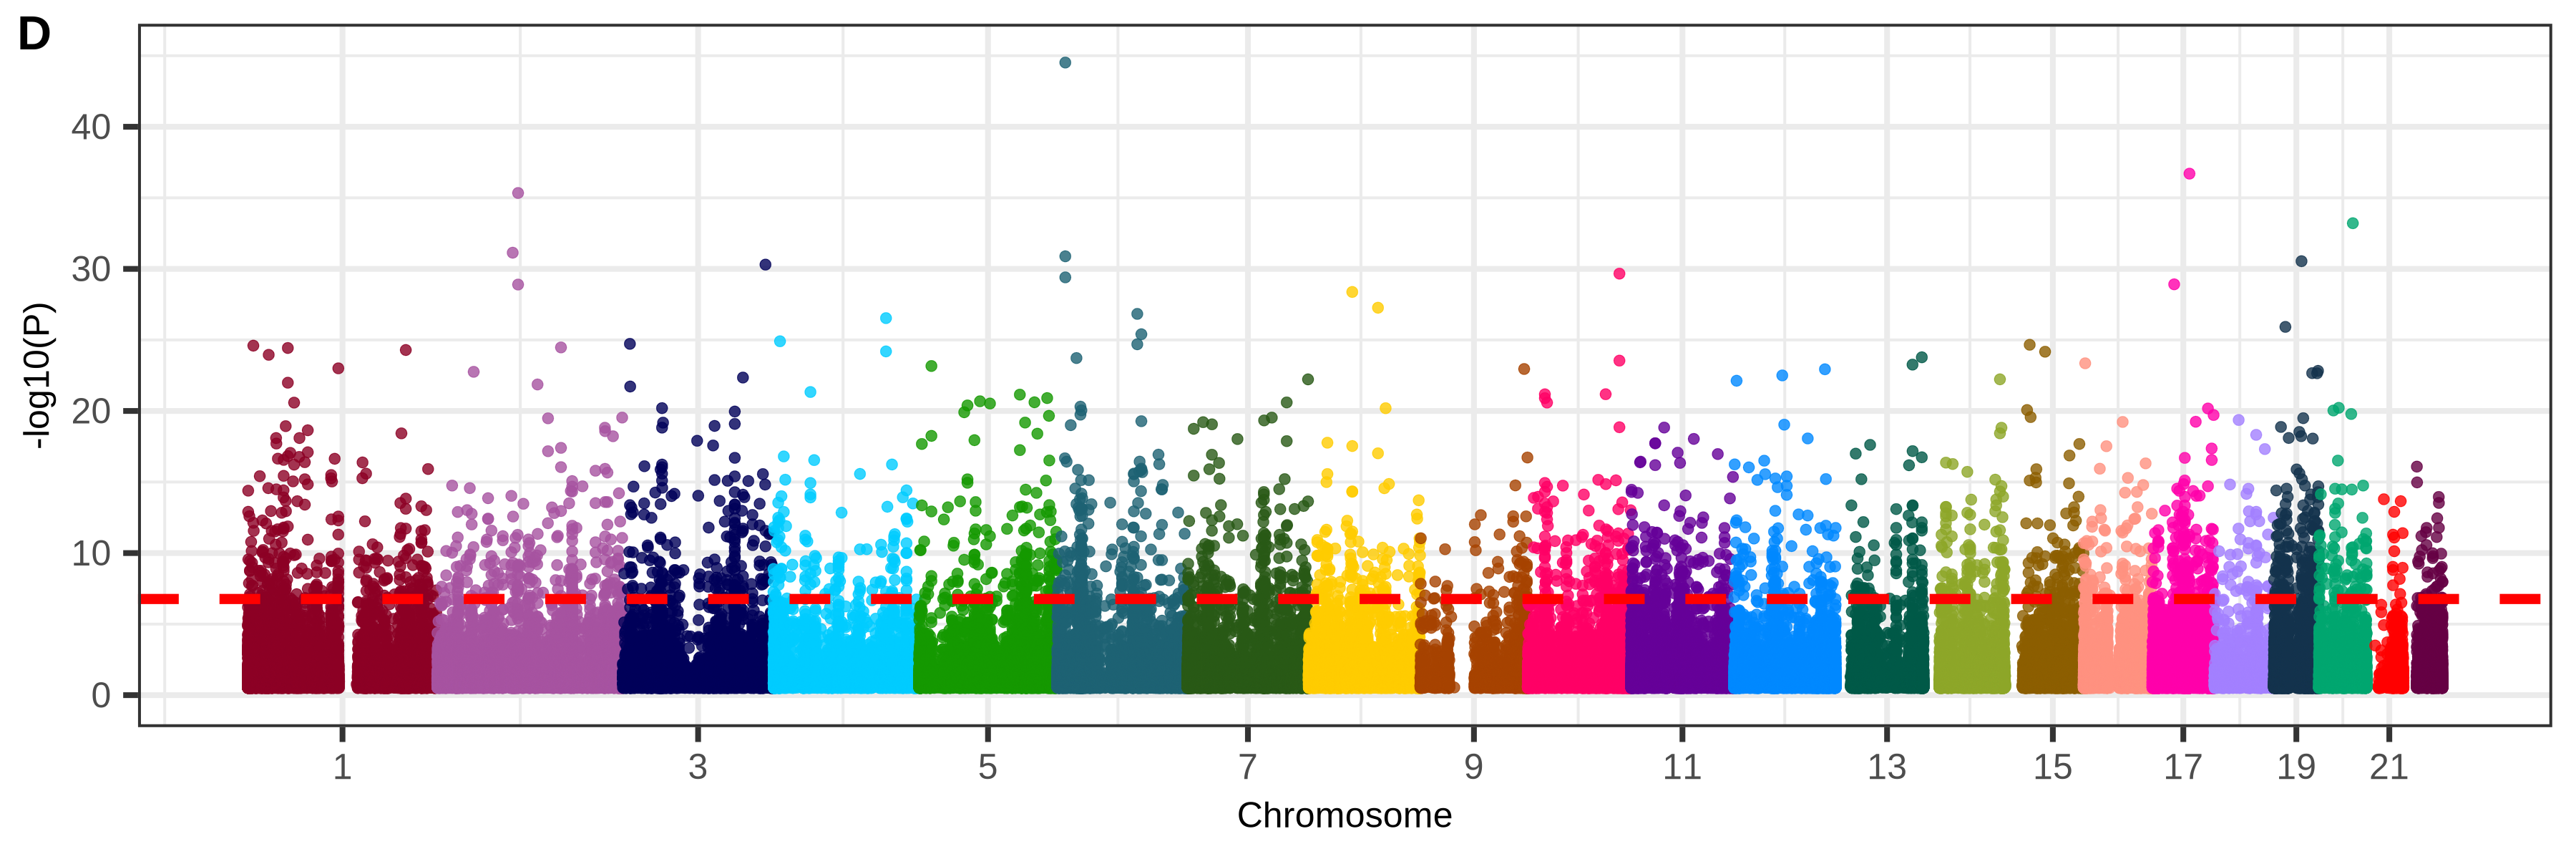

In [4]:
library(ggplot2)
library(cowplot)
library(dplyr)

load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/update_lit_sites.RData")
load("/share/hennlab/vault/people/shyamie/methylation/results/methylation_age.RData")
setwd("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/")
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/metagen_all3_no_meqtl_regress.RData")

#meqtl regressed
#load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/metagen_all3_meqtl_regressed.RData")

#fusion regressed
#load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/metagen_all3_fusion_regressed.RData")

sig <- subset(meta_gen, P.value.fix < .05/nrow(meta_gen))
print(nrow(sig))
n <- .05 / nrow(sig)

# Prepare data for ggplot2
testinfo <- meta_gen[, c(1, 3, 4)]
site.info <- probe.info[probe.info$TargetID %in% testinfo$CPG.Labels,]
testinfo <- testinfo %>% rename(label = 1, sig_pvalue = 2)
site.info <- site.info %>% rename(TargetID = TargetID, CHR = CHR, MAPINFO = MAPINFO)

# Merge testinfo and site.info
merged_data <- merge(testinfo, site.info, by.x = "label", by.y = "TargetID")

# Convert chromosomes to numeric values
merged_data$CHR <- as.character(merged_data$CHR)
merged_data$CHR[merged_data$CHR == "X"] <- 23
merged_data$CHR[merged_data$CHR == "Y"] <- 24
merged_data$CHR <- as.numeric(merged_data$CHR)

merged_data$BP <- as.numeric(merged_data$MAPINFO)
merged_data$P <- merged_data$sig_pvalue
gwasResults <- merged_data
# Prepare the dataset
don <- gwasResults %>%
  # Compute chromosome size
  group_by(CHR) %>%
  summarise(chr_len = max(BP)) %>%
  # Calculate cumulative position of each chromosome
  mutate(tot = cumsum(chr_len) - chr_len) %>%
  select(-chr_len) %>%
  # Add this info to the initial dataset
  left_join(gwasResults, ., by = c("CHR" = "CHR")) %>%
  # Add a cumulative position of each SNP
  arrange(CHR, BP) %>%
  mutate(BPcum = BP + tot) %>%
  # Filter SNP to make the plot lighter
  filter(-log10(P) > 0.5)

# Prepare X axis
axisdf <- don %>% 
  group_by(CHR) %>% 
  summarize(center = (max(BPcum) + min(BPcum)) / 2)

# Filter to include every other chromosome
filtered_axisdf <- axisdf %>% filter(row_number() %% 2 == 1)

# Prepare text description for each SNP
alpha <- 0.05 / nrow(gwasResults)
threshold <- -log10(alpha)

# Make the plot
p <- ggplot(don, aes(x = BPcum, y = -log10(P))) +
  # Show all points
  geom_point(aes(color = as.factor(CHR)), alpha = 0.8, size = 4) +
  scale_color_manual(values = rep(c("#8c0025", "#a653a0", "#000059", "#00ccff", "#149900", "#1d6273",
                                    "#285916", "#ffcc00", "#a64200", "#ff0066", "#660099", "#0088ff",
                                    "#005947", "#8da629", "#8c5e00", "#ff9180", "#ff00aa", "#a280ff",
                                    "#13324d", "#00a66f", "#ff0000", "#660044", "#686080", "#eeff00"), 
                                  length(unique(gwasResults$CHR)))) +
  # Custom X axis
  scale_x_continuous(label = filtered_axisdf$CHR, breaks = filtered_axisdf$center) +
  scale_y_continuous(expand = c(0, 0)) +     # remove space between plot area and x axis
  ylim(0, 45) +
  # Add genome-wide significance threshold line
  geom_hline(yintercept = threshold, linetype = "dashed", color = "red", size = 4) +
  # Custom the theme
 theme_bw(base_size = 50) + 
  theme(legend.position = "none",
         axis.text = element_text(size = 30),
        axis.title = element_text(size = 30, margin = margin(r = 10)),
        plot.title = element_text(size = 50 ), plot.margin = margin(t = 20, r = 20, b = 20, l = 20)) + labs(x = "Chromosome")

# Display the plot
p

# Create the combined plot
options(repr.plot.width = 30, repr.plot.height = 10)

cow_D <- plot_grid(p, nrow = 1, ncol = 1, labels = c("D"), label_size = 40)

# Add black border
cow_D <- cow_D + theme(plot.background = element_rect(color = "black"))

# Display the combined plot
cow_D


In [5]:
options(repr.plot.width = 30, repr.plot.height = 20)
svg("Figure2.svg", width=30, height=20)
plot_grid(cow_AC, cow_D, nrow = 2)
dev.off()

png 
  2

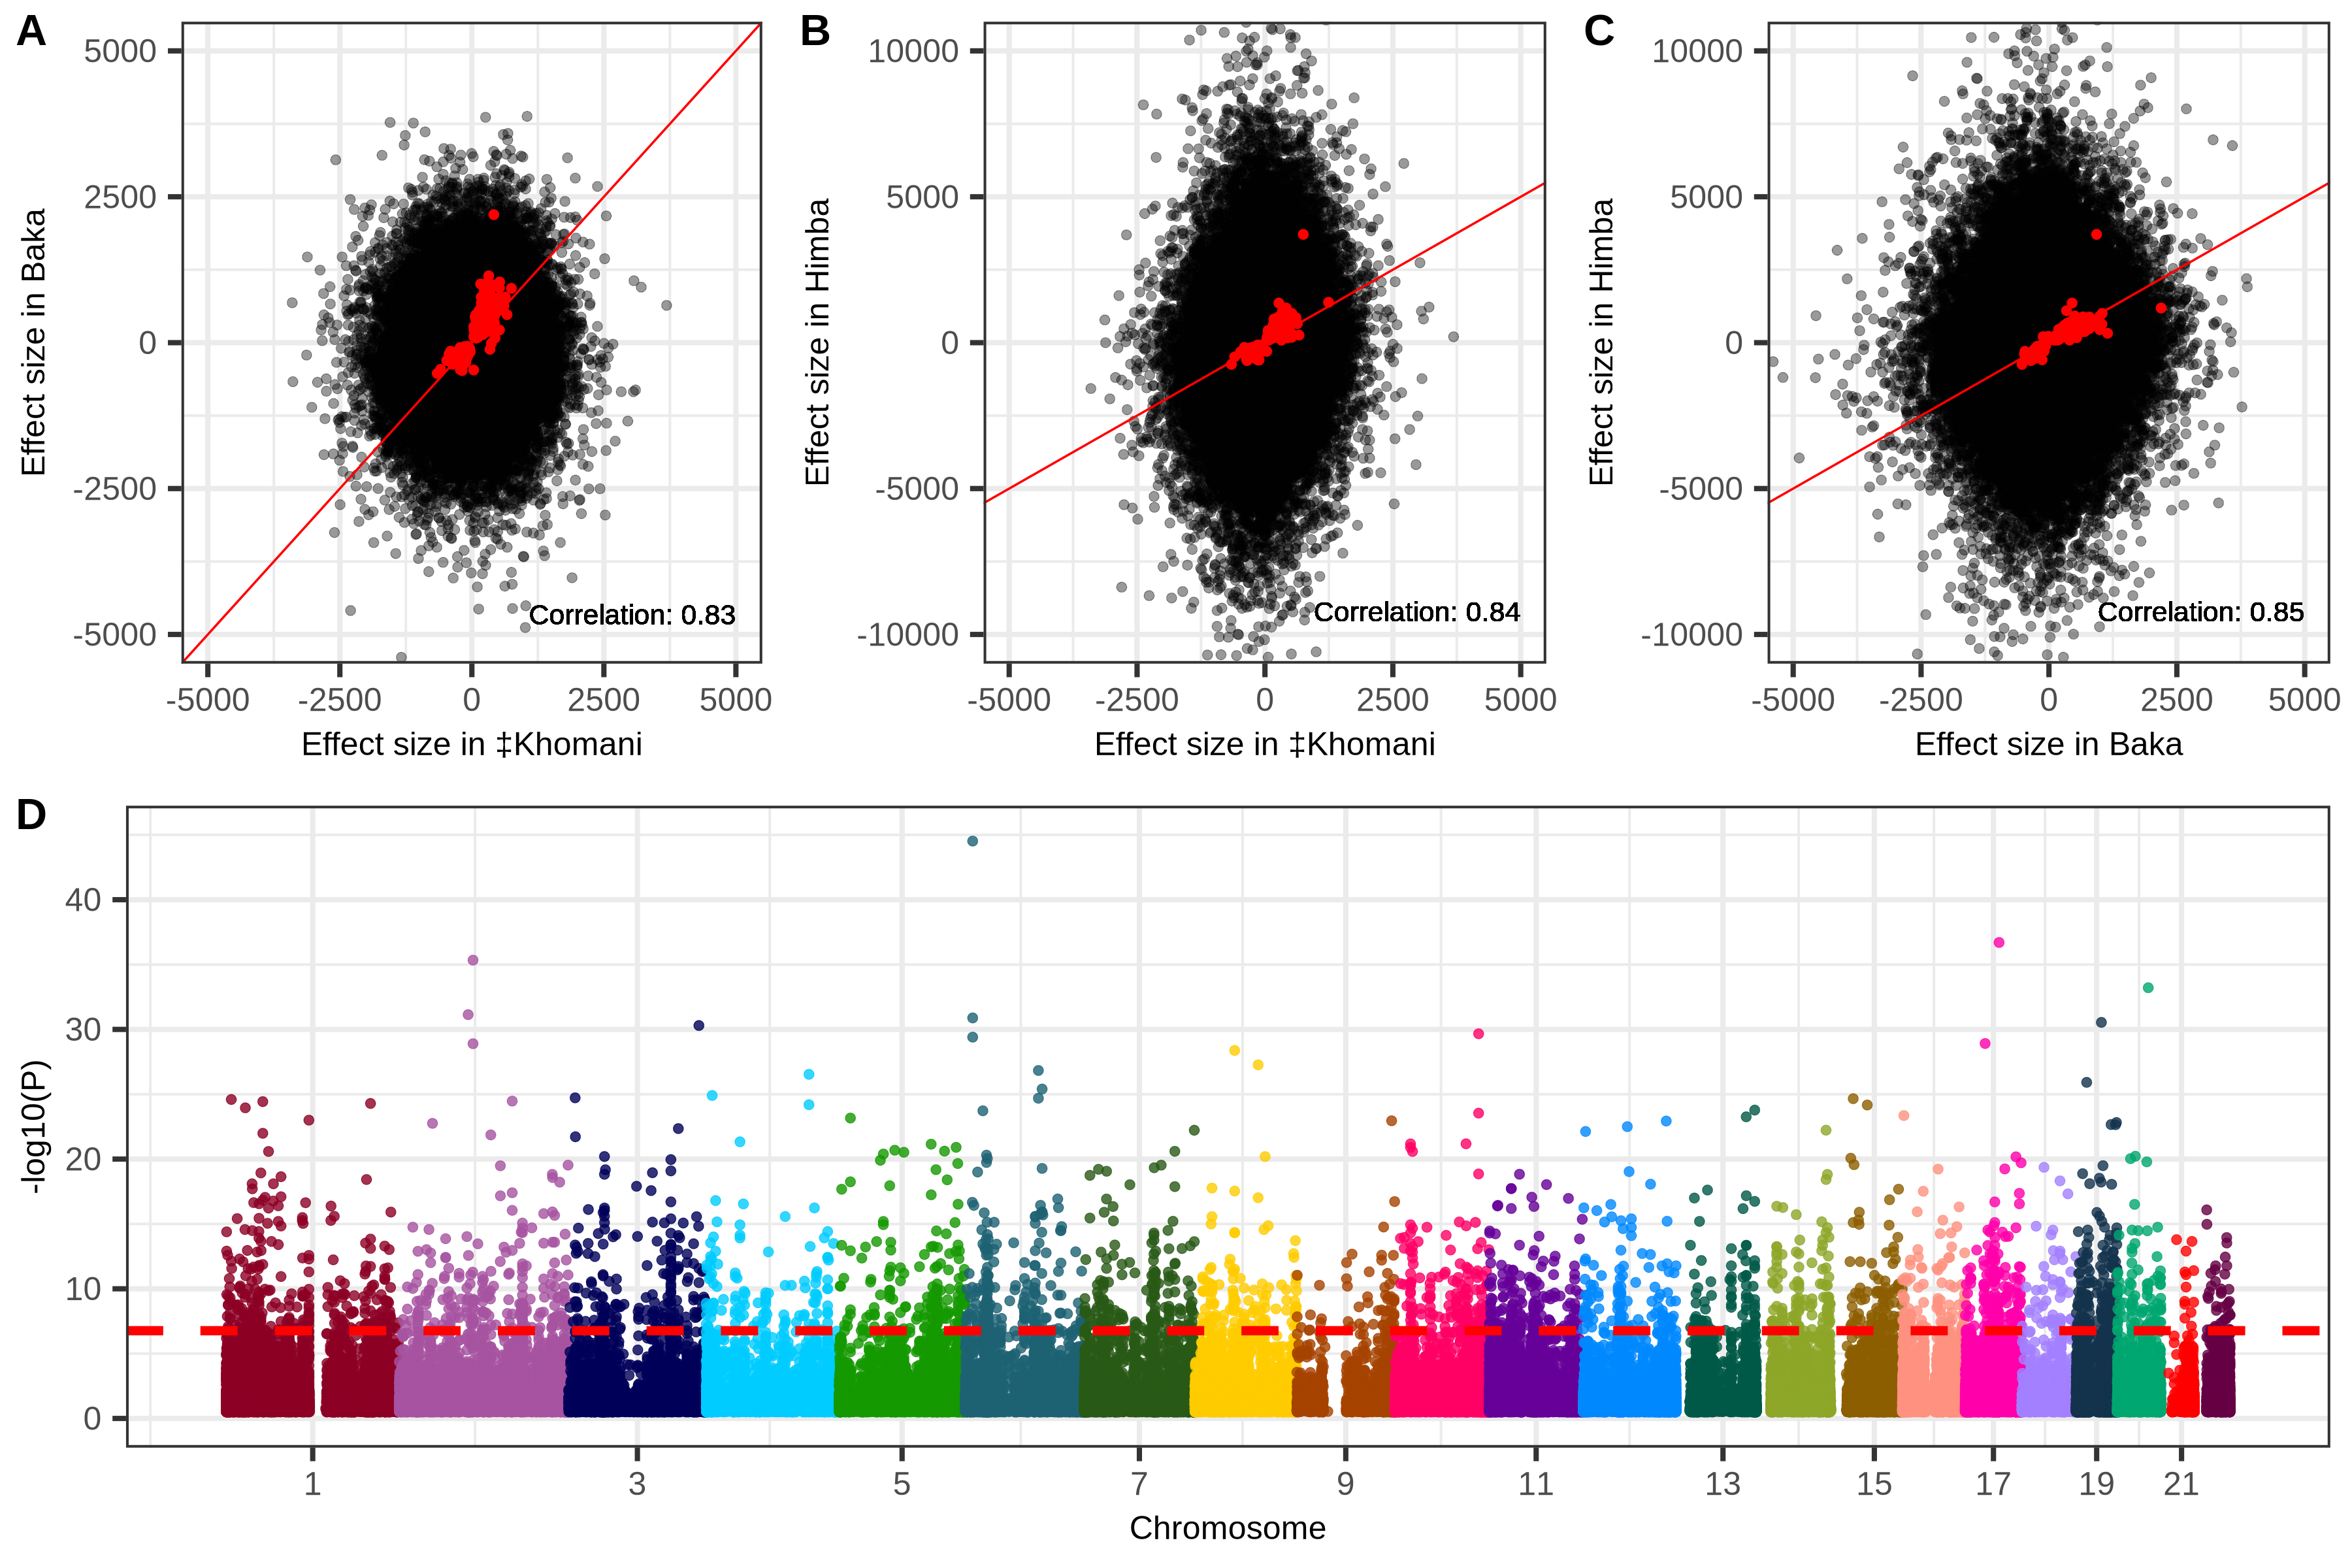

In [6]:
options(repr.plot.width = 30, repr.plot.height = 20)


plot_grid(cow_AC, cow_D, nrow = 2)